In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

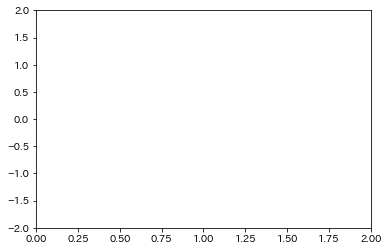

In [3]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [4]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [5]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [6]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [7]:
HTML(anim.to_html5_video())

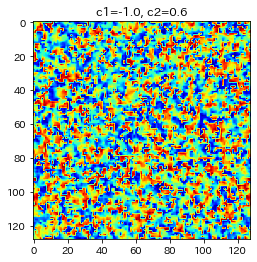

In [8]:
# coding: UTF-8
# -*- coding: utf-8 -*-

"""
TDGL model of complex variables as a model of reaction-diffusion phenomena
described in chap. 15 of Ohta's textbook.

Input variables of odeint must be 1 dimensional array=list.
"""
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

size = 128
amp = np.zeros((size, size))    # used in the computing process as amplitudes
diff = np.array(amp, dtype=np.complex128)   # used as the Laplacian term
crgb = np.array(amp, dtype=np.float64)          # for plot

x = np.random.rand(size, size)
x = np.array(x, dtype=np.complex128)
y = np.array(x, dtype=np.complex128)


def updateField(x_in, x_out, ci=1 + 0.6j, Di= 1 -1.0j):
    """
    Compute the evolution of the complex field by the Euler method.  
    periodic boundary condition
    coefficients ci and Di are complex
    """
    
    DT = 0.01 # time step
    amp = np.absolute(x_in)
    amp = np.power(amp,2)
    diff[1:-1, 1:-1] = x_in[0:-2, 1:-1] + x_in[2:, 1:-1] + x_in[1:-1, 0:-2]  + x_in[1:-1, 2:] - 4.0* x_in[1:-1, 1:-1]
    x_out[1:-1,1:-1] = x_in[1:-1, 1:-1] + DT*(1.0 - ci* amp[1:-1, 1:-1])*x_in[1:-1, 1:-1] + DT* Di * diff[1:-1, 1:-1]
    
    x_out[0, 1:-2] = x_out[-2, 1:-2]  # periodic boundary condition
    x_out[1:-1, 0] = x_out[1:-1,-2]
    x_out[-1, 1:-1] = x_out[1, 1:-1]
    x_out[1:-1, -1] = x_out[1:-1, 1]
    x_out[0, 0] = x_out[-2,-2]
    x_out[0, -1] = x_out[-2, 1]
    x_out[-1, 0] = x_out[1, -2]
    x_out[-1, -1] = x_out[1, 1]


# parameters of the differential equation
c1 = -1.0
c2 = 0.6
Di = 1.0  + c1*1.0j
ci = 1.0 + c2*1.0j

# initial configuration
for n in range(size):
    for m in range(size):
        x[n,m] = 0.2*(np.random.rand() -0.5 + (np.random.random() - 0.5)* 1.0j)

# setting for animation
step = 5
width_ode = 0.05
width_plot = 50
t = np.linspace(0,width_ode,step)

# Create new Figure and an Axes which fills it.
fig = plt.figure()
crgb = np.angle(x)
im = plt.imshow(crgb, animated=True, cmap="jet")
plt.title("c1=" + str(c1) + ", c2=" + str(c2))

def animate(i):
    global x, y, t4plot, ci, Di, size
    
    # integration
    for count in range(20):
        updateField(x, y, ci, Di)
        updateField(y, x, ci, Di)
    
    # update data for plotting
    crgb =  np.angle(x)
    im.set_array(crgb)
    return im,

anim = animation.FuncAnimation(fig, animate,
                               frames=500, interval=50, blit=True)
# anim.save('ctdgl2d.c1_1.0_c2_0.6.mp4', fps=15, extra_args=['-vcodec', 'libx264'])
# anim.save('test2.mp4', fps=15, extra_args=['-vcodec', 'libxvid'])  # windows media player OK, firefox NG
# anim.save('oscillator_xyz_t.gif', writer='imagemagick',  fps=30)
#plt.show()


In [10]:
'''
It takes somewhat long time until the movie start
because it starts after completing the mpeg4 file for a given number of frames.
However, once the mpeg4 file is created, it is included in the notebook file,
so it runs immediately from the next time.
'''
HTML(anim.to_html5_video())